In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import textwrap
from pycirclize import Circos

In [3]:
chordata_results = pd.read_csv("results/combined_taxonomy_results/Chordata_GOEA_results.txt", sep = '\t')

In [4]:
def extract_top_results(df):
    top_results = []
    
    for namespace in ['Biological Process', 'Molecular Function', 'Cellular Component']:
        namespace_res = df[df['Namespace'] == namespace]
        namespace_res = namespace_res.sort_values(by=['Statistical significance', 'log(Odds Ratio)'], ascending=[True, False]).head(10)
        top_results.append(namespace_res)
    
    top_results_df = pd.concat(top_results)
    
    return top_results_df

In [5]:
top_results_by_namespace = extract_top_results(chordata_results)
top_results_by_namespace.to_csv("top_results.tsv", index=False, sep='\t')

In [6]:
top_results_by_namespace.sort_values(by='log(Odds Ratio)')

,GO Term ID,Name,Namespace,log(Odds Ratio),Statistical significance
73,GO:0030425,Dendrite,Cellular Component,1.077,0.006198
63,GO:0098966,Perisynaptic extracellular matrix,Cellular Component,1.101,0.006198
306,GO:1905360,GTPase complex,Cellular Component,1.180,0.006198
197,GO:0005795,Golgi stack,Cellular Component,1.185,0.006198
106,GO:0005905,Clathrin-coated pit,Cellular Component,1.193,0.006198
204,GO:0031519,PcG protein complex,Cellular Component,1.268,0.006198
192,GO:0098802,Plasma membrane signaling receptor complex,Cellular Component,1.410,0.006198
269,GO:0098794,Postsynapse,Cellular Component,1.541,0.006198
170,GO:0044309,Neuron spine,Cellular Component,1.670,0.006198
484,GO:0098926,Postsynaptic signal transduction,Biological Process,1.988,0.006198


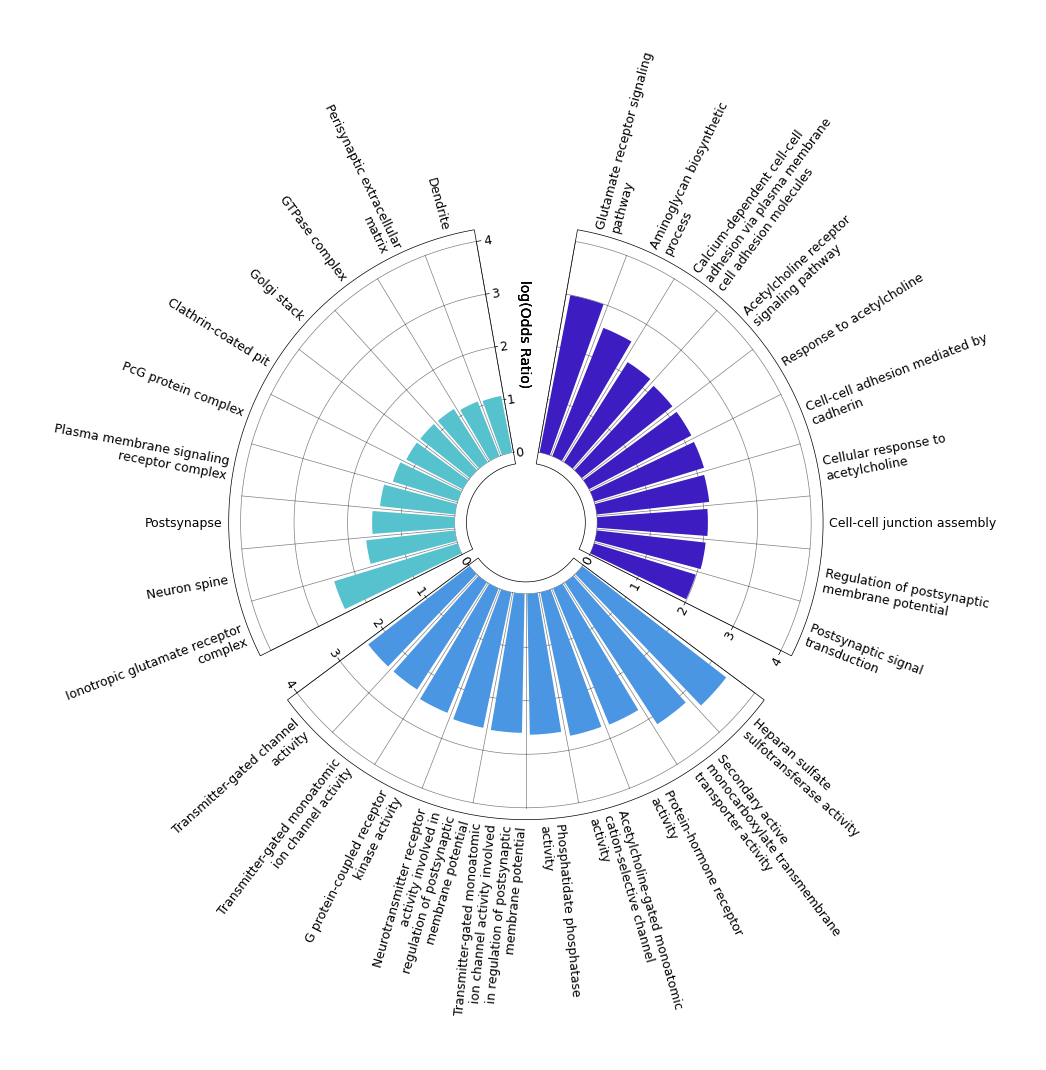

In [55]:
sectors = {
    "Biological Process": 10, 
    "Molecular Function": 10, 
    "Cellular Component": 10
}
colormap = {
    "Biological Process": "#3D1DC1",
    "Molecular Function": "#4A96E3",
    "Cellular Component": "#55C2CE"
}
circos = Circos(sectors, space=10, start = 10)

for sector in circos.sectors:
    track = sector.add_track((20, 100), r_pad_ratio=0.1)
    x = np.linspace(1, int(track.size), int(track.size)) - 0.5
    y = top_results_by_namespace[top_results_by_namespace['Namespace'] == sector.name]['log(Odds Ratio)'].to_numpy()
    
    list_of_names = top_results_by_namespace[top_results_by_namespace['Namespace'] == sector.name]['Name'].tolist()

    wrapped_labels_list = [textwrap.fill(name, 30) for name in list_of_names]

    labels = np.array(wrapped_labels_list)
    track.xticks(
        x, 
        labels, 
        tick_length=0,
        label_margin=2,
        label_orientation="vertical",
        label_size=9
    )
    track.axis()
    track.bar(
        x, 
        y, 
        vmin=0, 
        vmax=4, 
        color=colormap[sector.name],

    )
    track.yticks(
        [0,1,2,3,4], 
        ["0", "1", "2", "3", "4"], 
        vmin=0, 
        vmax=4,
        label_size=9
    )
    track.grid(
        y_grid_num=5, 
        x_grid_interval=1, 
        color='black'
    )
    circos.text(
        "log(Odds Ratio)", 
        r=45, 
        color="black", 
        size=10,
        orientation='vertical',
        adjust_rotation=True,
        deg=360
    )
    
fig = circos.plotfig(figsize = (10, 10))
plt.savefig('top_results.svg', format="svg", dpi=600, bbox_inches='tight', pad_inches=0)
